In [3]:
import pandas as pd
import numpy as np 


In [5]:
import scipy.stats as stats


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [10]:
df=sns.load_dataset('titanic')

In [11]:
df['age']=df['age'].fillna(df['age'].mean())

In [23]:
df.isnull().sum()

survived    0
age         0
fare        0
dtype: int64

In [25]:
df=df[['survived','age','fare']]

In [27]:
x=df.iloc[:,1 :]
y=df.iloc[:,0]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
x_train

,age,fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


C:\Users\zulqa\AppData\Local\Temp\ipykernel_31728\2489881984.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['age'])


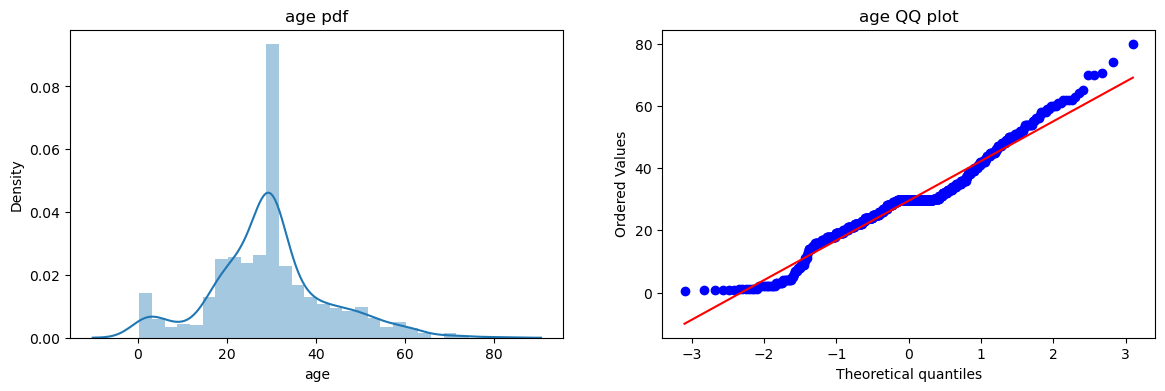

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['age'])
plt.title('age pdf')

plt.subplot(122)
stats.probplot(x_train['age'],dist='norm',plot=plt)
plt.title('age QQ plot')

plt.show()

C:\Users\zulqa\AppData\Local\Temp\ipykernel_31728\3935611804.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['fare'])


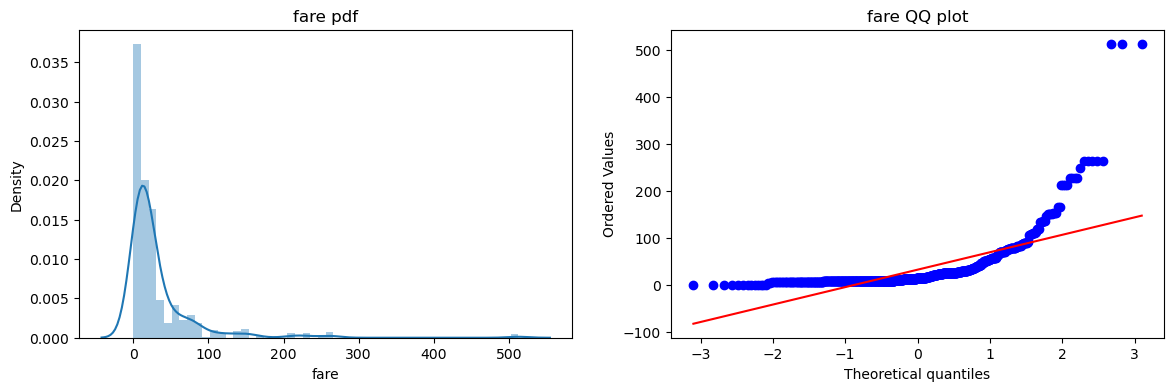

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['fare'])
plt.title('fare pdf')

plt.subplot(122)
stats.probplot(x_train['fare'],dist='norm',plot=plt)
plt.title('fare QQ plot')

plt.show()

In [37]:
dt=DecisionTreeClassifier()
lr=LogisticRegression()

In [39]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
lr_pred=lr.predict(x_test)
dt_pred=dt.predict(x_test)

In [43]:
print('lr ',accuracy_score(y_test,lr_pred))
print('dt ',accuracy_score(y_test,dt_pred))

lr  0.6480446927374302
dt  0.6759776536312849


## Function Transformer

In [45]:
trf=FunctionTransformer(func=np.log1p)

In [47]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.fit_transform(x_test)

In [49]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()


In [51]:
lr.fit(x_train_transformed,y_train)
dt.fit(x_train_transformed,y_train)

DecisionTreeClassifier()

In [53]:
lr_pred=lr.predict(x_test_transformed)
dt_pred=dt.predict(x_test_transformed)

In [55]:


print('lr',accuracy_score(y_test,lr_pred))
print('dt',accuracy_score(y_test,dt_pred))

lr  0.6815642458100558
dt  0.6815642458100558


In [58]:
x_transform=trf.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('lr ',np.mean(cross_val_score(clf,x_transform,y,scoring='accuracy',cv=10)))
print('dt ',np.mean(cross_val_score(clf2,x_transform,y,scoring='accuracy',cv=10)))

lr  0.678027465667915
dt  0.6621972534332085


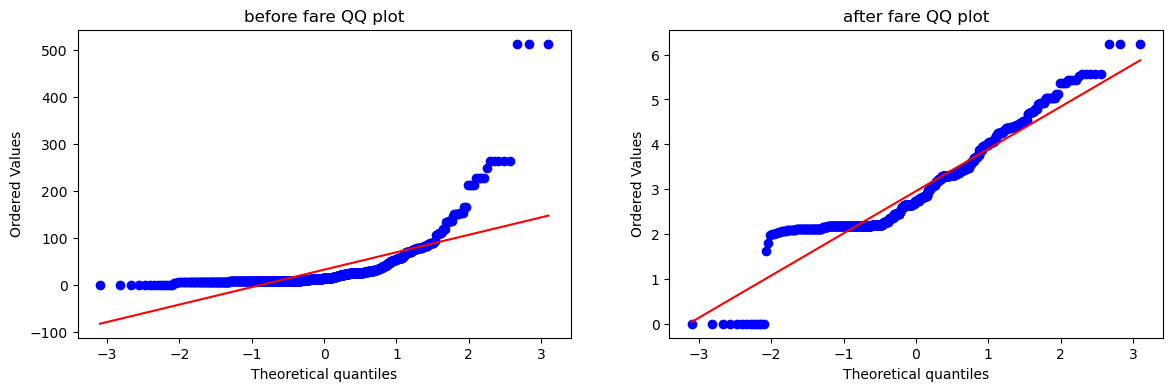

In [62]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['fare'],dist='norm',plot=plt)
plt.title('before fare QQ plot')

plt.subplot(122)
stats.probplot(x_train_transformed['fare'],dist='norm',plot=plt)
plt.title('after fare QQ plot')

plt.show()

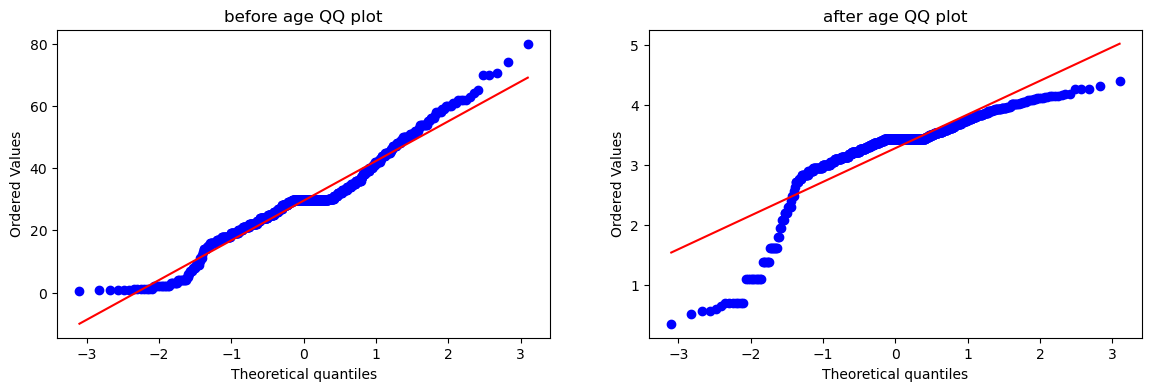

In [100]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['age'],dist='norm',plot=plt)
plt.title('before age QQ plot')

plt.subplot(122)
stats.probplot(x_train_transformed['age'],dist='norm',plot=plt)
plt.title('after age QQ plot')

plt.show()

In [64]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['fare'])],remainder='passthrough')

In [66]:
x_train_transformed2=trf2.fit_transform(x_train)
x_test_transformed2=trf2.fit_transform(x_test)

In [68]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [70]:
lr_pred=lr.predict(x_test_transformed2)
dt_pred=dt.predict(x_test_transformed2)

C:\Users\zulqa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\zulqa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [72]:
print('lr ',accuracy_score(y_test,lr_pred))
print('dt ',accuracy_score(y_test,dt_pred))

lr  0.40782122905027934
dt  0.6256983240223464


In [74]:
x_transform2=trf2.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('lr ',np.mean(cross_val_score(clf,x_transform2,y,scoring='accuracy',cv=10)))
print('dt ',np.mean(cross_val_score(clf2,x_transform2,y,scoring='accuracy',cv=10)))

lr  0.6712609238451936
dt  0.6588389513108613


In [80]:
def apply_transform(transform):
    x=df.iloc[:,1:3]
    y=df.iloc[:,0]
    trf= ColumnTransformer([('log',FunctionTransformer(transform),['fare'])],remainder='passthrough')
    x_train=trf.fit_transform(x)
    clf=LogisticRegression()
    print('accuracy',np.mean(cross_val_score(clf,x_train,y,scoring='accuracy',cv=10)))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(x['fare'],dist='norm',plot=plt)
    plt.title('fare before trnsformation')
    plt.subplot(122)
    stats.probplot(x_train[:,0],dist='norm',plot=plt)
    plt.title('fare after transform')
    plt.show()

accuracy 0.61729088639201


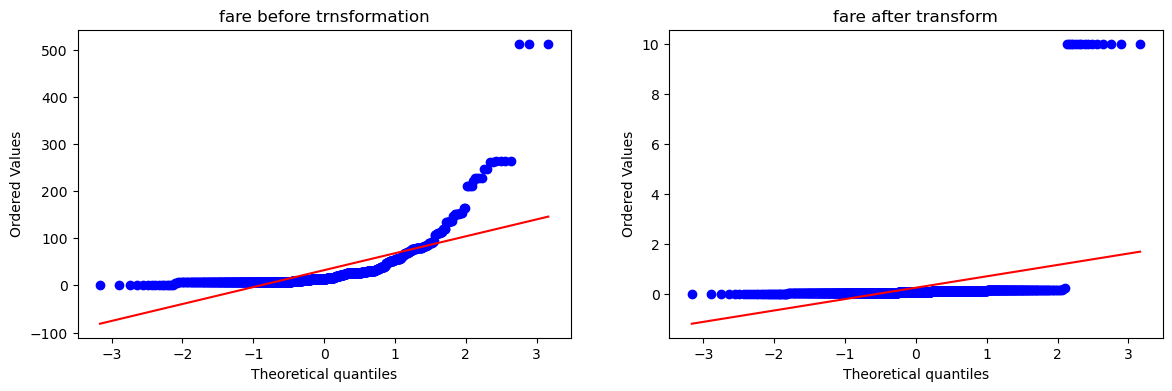

In [97]:
apply_transform(lambda x: (1/(x+0.1)))